In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
#Read in the data
labdata=pd.read_csv("data.csv", header=None, names=["ID","clump_thickness","size_uniformity","shape_uniformity",
                                           "marginal_adhesion","epithelial_size","nuclei","bland_chromatin",
                                           "nucleoli","mitoses","class"])
#note that Class 2 = benign and 4 = malignant

In [12]:
labdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                   699 non-null int64
clump_thickness      699 non-null int64
size_uniformity      699 non-null int64
shape_uniformity     699 non-null int64
marginal_adhesion    699 non-null int64
epithelial_size      699 non-null int64
nuclei               699 non-null object
bland_chromatin      699 non-null int64
nucleoli             699 non-null int64
mitoses              699 non-null int64
class                699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


Lets try to understand the data a bit too:

*** malignant = cancerous
*** benign = not
from web: https://answers.yahoo.com/question/index?qid=20101204013824AAWTufG
- cancer cells tend to vary in size and shape, so uniformity points in benign direction
- bare nuclei, bland chromatin, and normal nucleoli are signs of benign

clump thickness: benign grouped in monolayers, cancerous cells in multilayers
uniformity: again, cancer cells vary
marginal adhesion: normal cells tend to stick together, cancer cells loss this ability. so los of adhesion is a sign of malignancy
single epithelial cell size: related to uniformity. significantly enlarged -> malignant
bare nuclei: not surrounded by cytoplasm/rest of cell. seen in benign tumors
bland chromatin: describes uniform texture of the nucleus seen in benign cells, cancer cells the chromatin is more coarse
normal nucleoli: small structures in the nucleus. normal cells, barely visible. cancer cells, more prominent sand sometimes more of them

In [13]:
labdata["nuclei"].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [15]:
labdata["nuclei"].count()

699

In [18]:
labdata["nuclei"].value_counts(dropna=False)

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: nuclei, dtype: int64

In [24]:
#need to fix this
labdata["nuclei"].replace(np.nan,None, inplace=True)

In [25]:
labdata["nuclei"].value_counts(dropna=False)

1.0     413
10.0    134
5.0      31
2.0      30
3.0      29
8.0      21
4.0      19
7.0       9
9.0       9
6.0       4
Name: nuclei, dtype: int64

In [23]:
labdata["nuclei"]=labdata["nuclei"].astype(int)

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [22]:
labdata["nuclei"].value_counts()

1.0     402
10.0    132
5.0      30
2.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: nuclei, dtype: int64

In [9]:
labdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                   699 non-null int64
clump_thickness      699 non-null int64
size_uniformity      699 non-null int64
shape_uniformity     699 non-null int64
marginal_adhesion    699 non-null int64
epithelial_size      699 non-null int64
nuclei               699 non-null int64
bland_chromatin      699 non-null int64
nucleoli             699 non-null int64
mitoses              699 non-null int64
class                699 non-null int64
dtypes: int64(11)
memory usage: 60.1 KB


In [10]:
labdata.tail()

,ID,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,nuclei,bland_chromatin,nucleoli,mitoses,class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118fb70b8>,
      dtype=object)

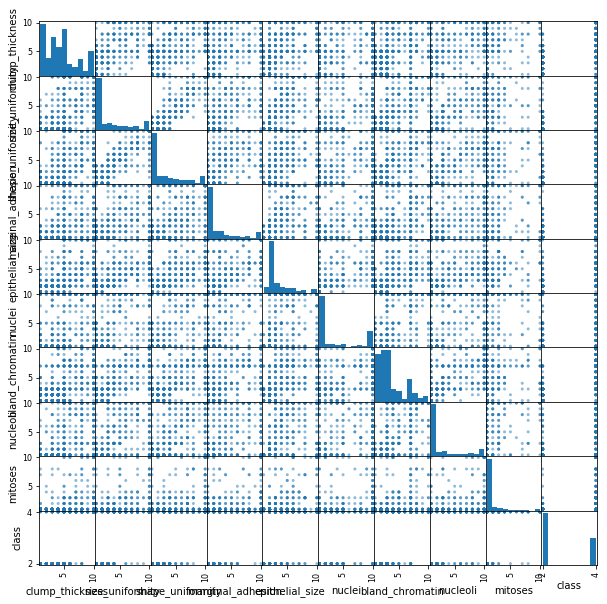

In [11]:
#lets get a first look on what this looks like

pd.plotting.scatter_matrix(labdata.drop(columns="ID"),figsize=(10,10), diagonal='hist')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118fe8ef0>,
      dtype=object)

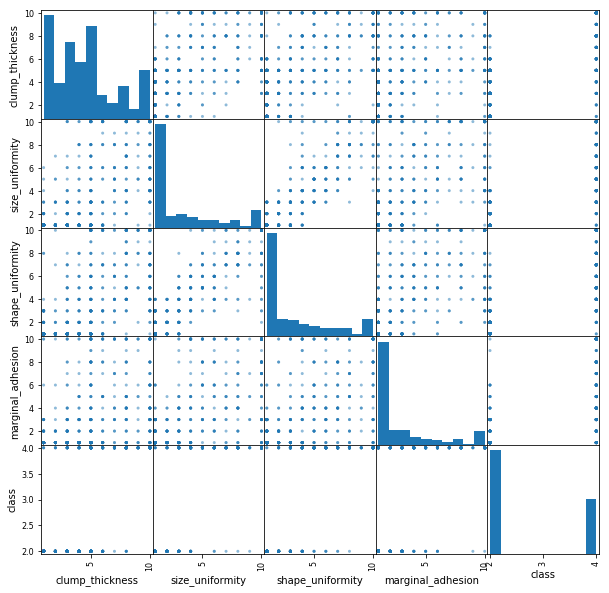

In [12]:
#splitting into 2 because its a lot of features
pd.plotting.scatter_matrix(labdata[['clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion','class']],figsize=(10,10), diagonal='hist')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b1a7390>,
      dtype=object)

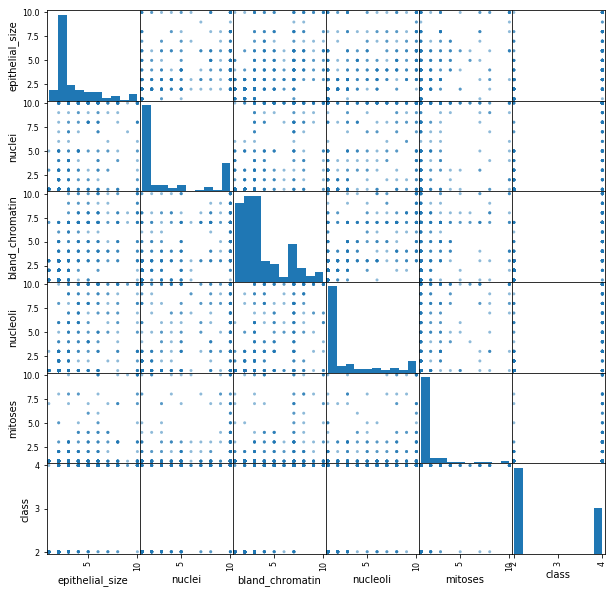

In [13]:
pd.plotting.scatter_matrix(labdata[['epithelial_size', 'nuclei', 'bland_chromatin',
       'nucleoli', 'mitoses','class']],figsize=(10,10), diagonal='hist')

In [14]:
### CLEARLY size and shape uniformity have the strongest relationship

#more careful looking, it looks like Mitoses is oppositely correlated with class? and marginal adhesion?

/anaconda3/envs/myproject/lib/python3.7/site-packages/pandas/plotting/_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=4.0, right=4.0
  ax.set_xlim(boundaries_list[j])
/anaconda3/envs/myproject/lib/python3.7/site-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=4.0, top=4.0
  ax.set_ylim(boundaries_list[i])
/anaconda3/envs/myproject/lib/python3.7/site-packages/pandas/plotting/_misc.py:100: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=4.0, right=4.0
  ax.set_xlim(boundaries_list[i])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11abeb898>,
      dtype=object)

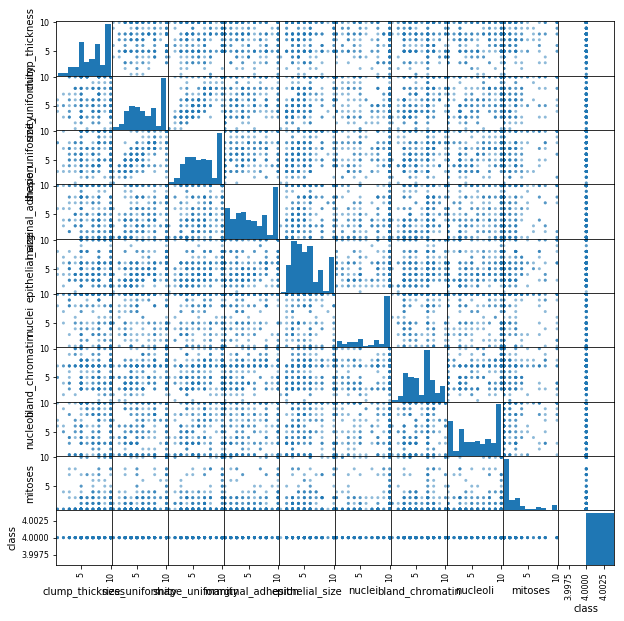

In [15]:
#what if we only look at certain classes?

pd.plotting.scatter_matrix(labdata[labdata["class"] == 4].drop(columns="ID"),figsize=(10,10), diagonal='hist')

Text(0.5, 0, 'Uniformity of Size')

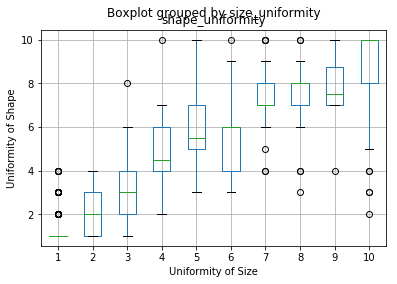

In [18]:
labdata.boxplot('shape_uniformity','size_uniformity')
plt.ylabel('Uniformity of Shape' )
plt.xlabel('Uniformity of Size' )

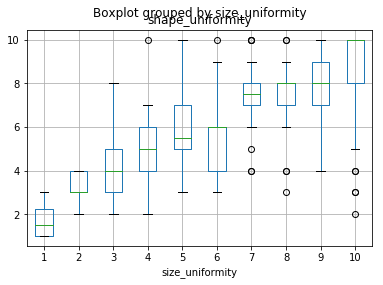

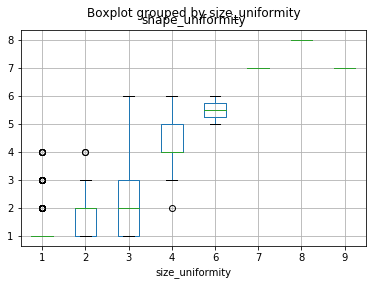

In [35]:
labdata[labdata["class"] == 4].boxplot('shape_uniformity','size_uniformity')
labdata[labdata["class"] == 2].boxplot('shape_uniformity','size_uniformity')

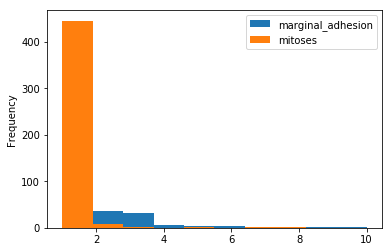

In [45]:
labdata[['marginal_adhesion','mitoses']][labdata['class'] ==2].plot.hist()
#labdata.plot.scatter('mitoses','class')

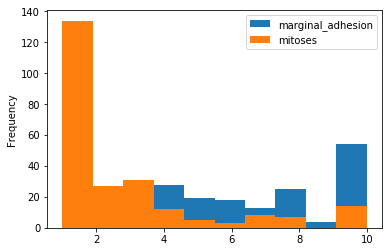

In [46]:
labdata[['marginal_adhesion','mitoses']][labdata['class'] ==4].plot.hist()


clump_thickness


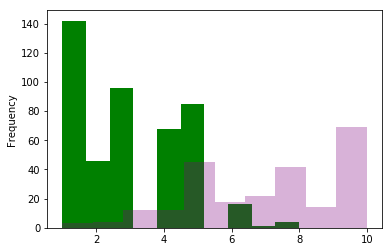

size_uniformity


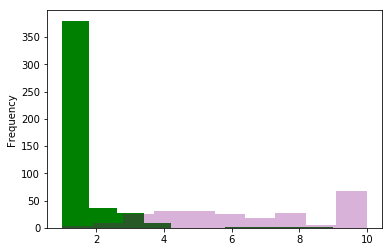

shape_uniformity


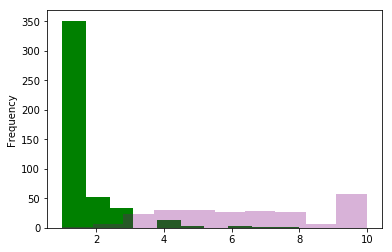

marginal_adhesion


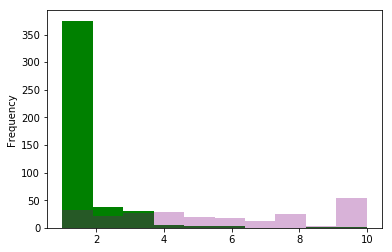

epithelial_size


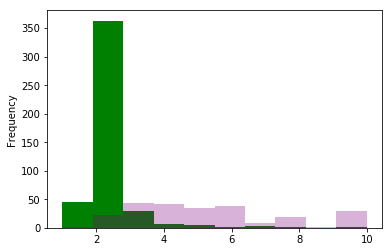

nuclei


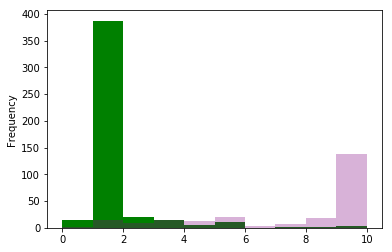

bland_chromatin


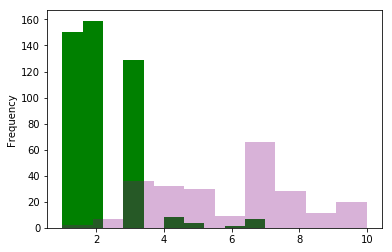

nucleoli


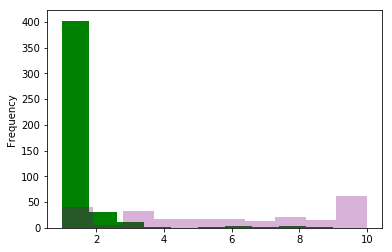

mitoses


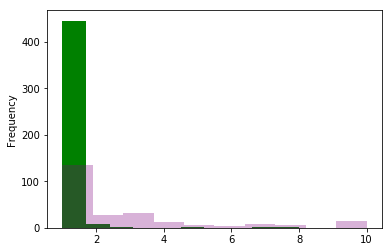

In [68]:
#hmm interesting, lets look at them all
for columnname in labdata.drop(columns=["ID","class"]).columns.values:
    print(columnname)
    labdata[columnname][labdata['class'] ==2].plot.hist(color="green")
    labdata[columnname][labdata['class'] ==4].plot.hist(color="purple", alpha=0.3)
    plt.show()


In [72]:
import seaborn as sns

sns.set(style="ticks")


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


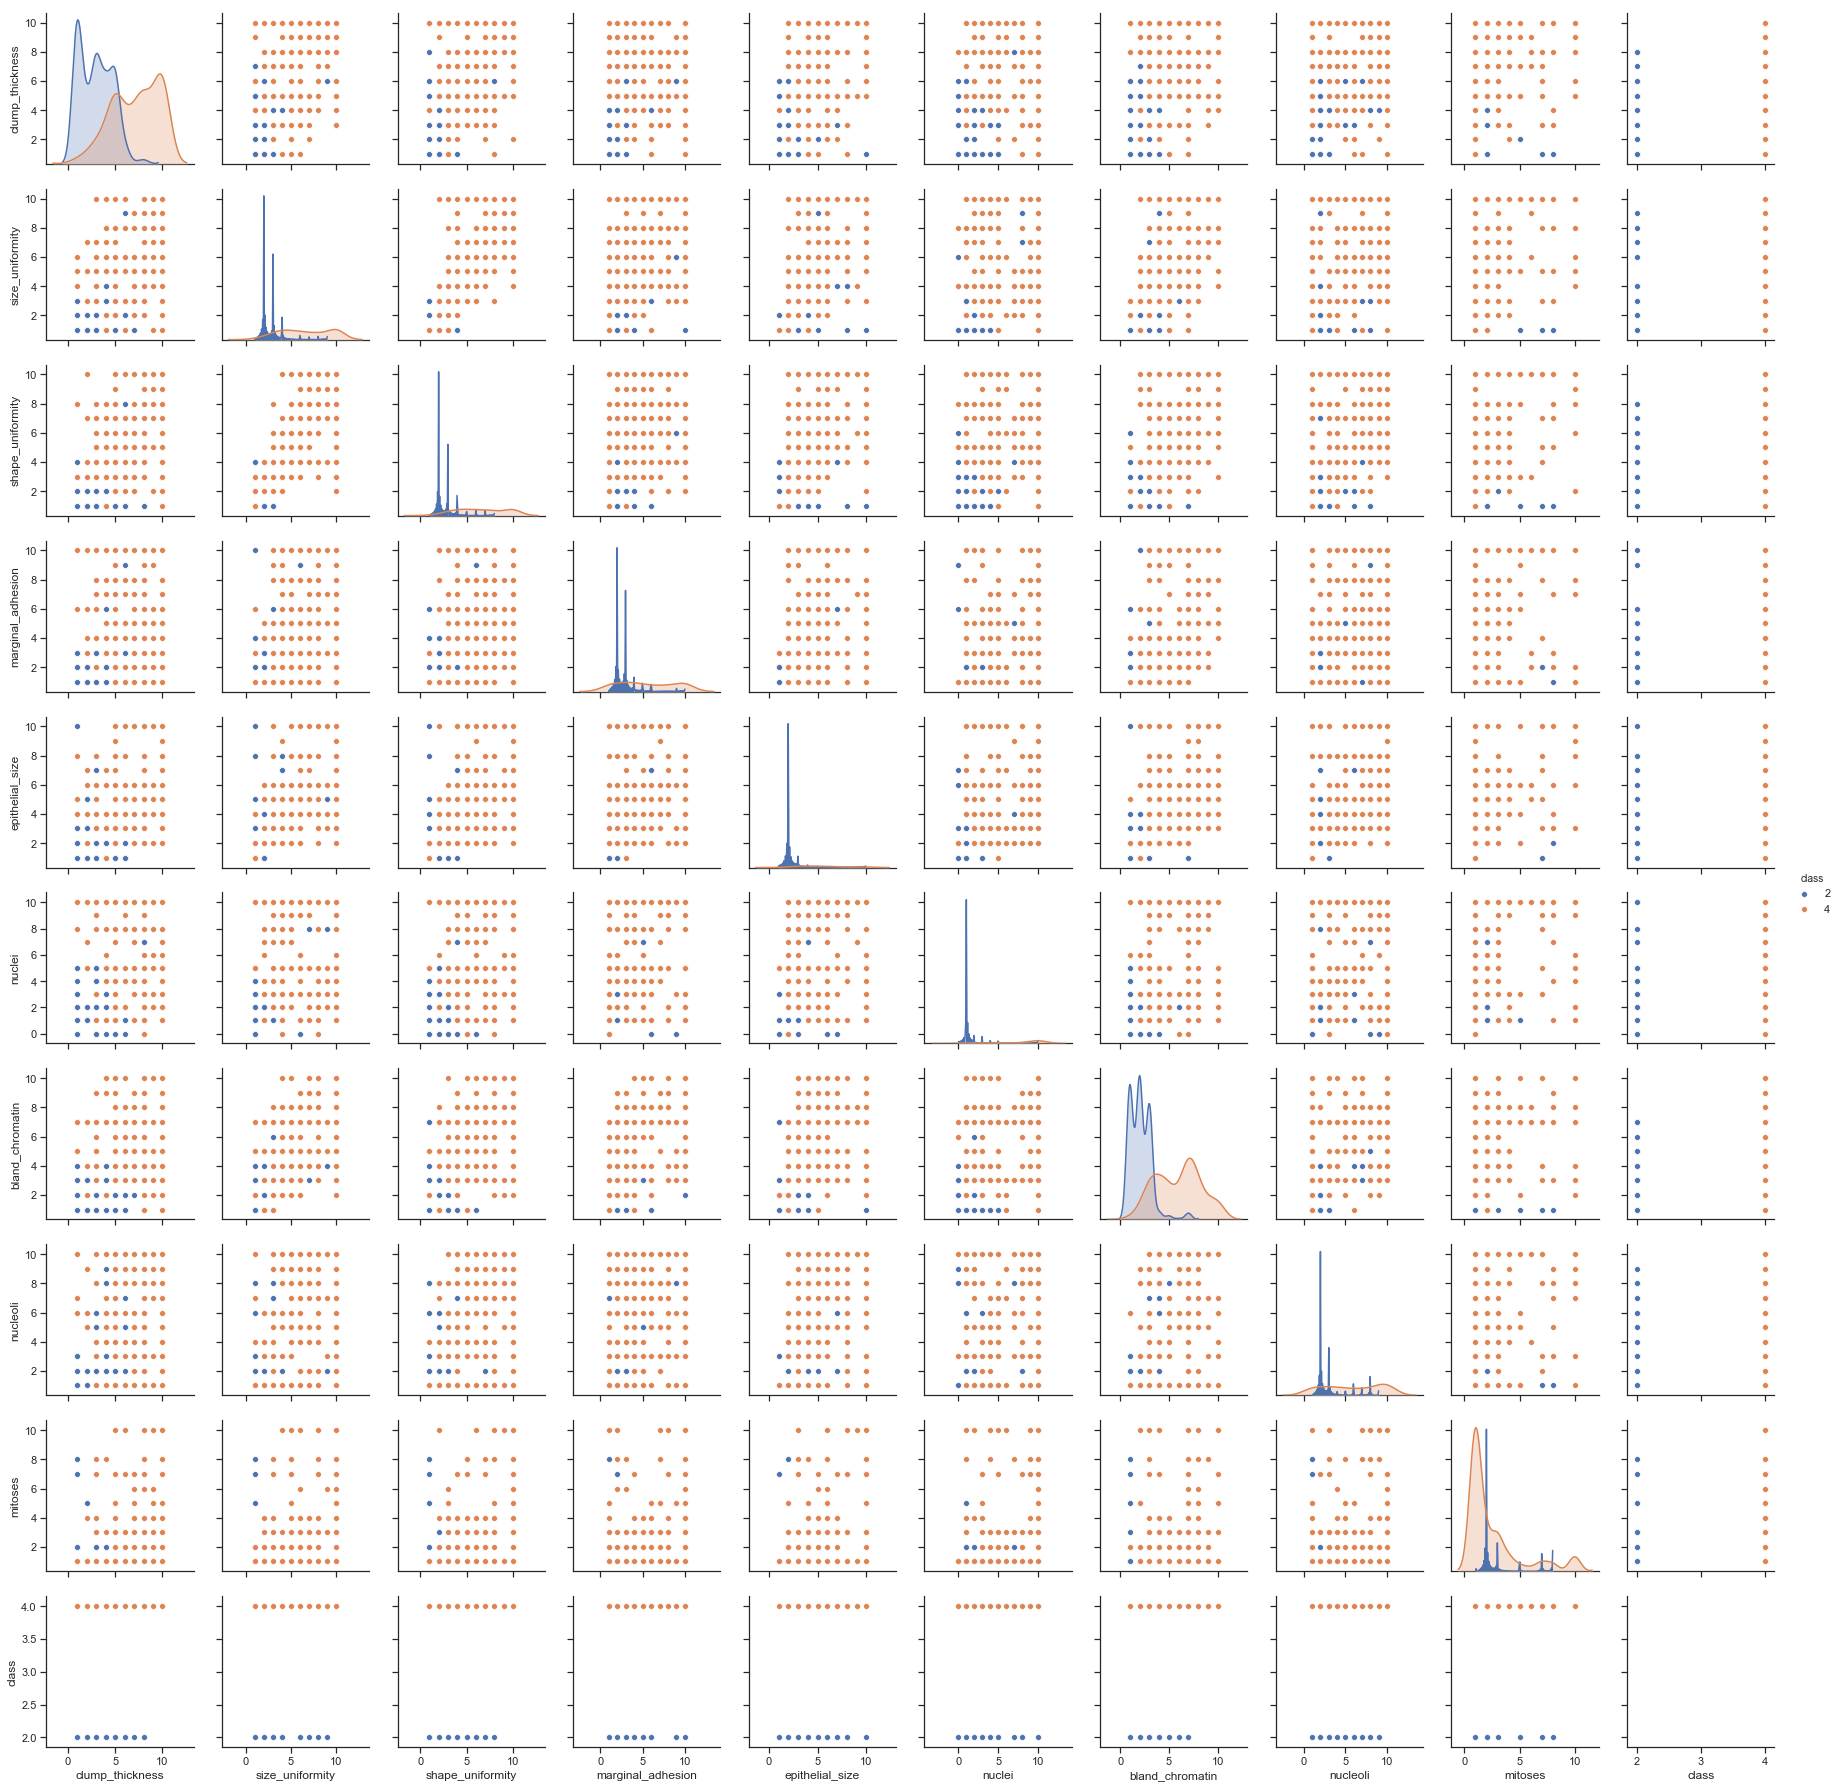

In [74]:
sns.pairplot(labdata.drop(columns=["ID"]), hue="class")

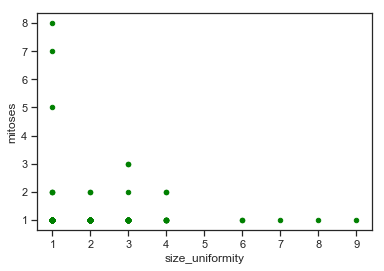

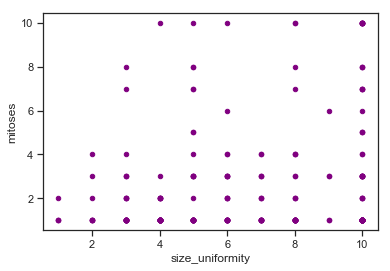

In [76]:
labdata[labdata['class'] ==2].plot.scatter("size_uniformity","mitoses",color="green")
labdata[labdata['class'] ==4].plot.scatter("size_uniformity","mitoses",color="purple")
    

In [ ]:
# so it looks like a lot of the variables are related to the class still
#
# thinking that a decision tree would be interesting
    #1. because the prob reminds me of the titanic prob,the class tree example
    #2. i feel like the output tree will let us understand why a prediction was made, as opposed to just some
        #predicatibility. so better for user interpretation and explaining to the PATIENT!
    #3. i think it can easily? be improved w pruning, bagging/boosting
        

Lets build a tree classifier. Starting with canned

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [14]:
#split dataset into features and target variable
labdata.head()

,ID,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,nuclei,bland_chromatin,nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [15]:
labdata.columns

Index(['ID', 'clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'nuclei', 'bland_chromatin',
       'nucleoli', 'mitoses', 'class'],
      dtype='object')

In [27]:
#features
feature_names=['clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'nuclei', 'bland_chromatin',
       'nucleoli', 'mitoses']
X=labdata[feature_names] 
#label / target variable
y=labdata["class"]

In [17]:
#split into training and test set. 
#randomly selects from the df

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=2)

In [18]:
# create a decision tree classifier object
tree=DecisionTreeClassifier()

In [19]:
#train it
tree=tree.fit(X_train,y_train)

In [20]:
#predict the response for the test dataset
y_pred=tree.predict(X_test)

In [21]:
tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [22]:
#compute the model accuracy
metrics.accuracy_score(y_test,y_pred)

0.9285714285714286

In [31]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

In [32]:
dot_data = StringIO()

export_graphviz(tree,out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names,class_names=['2','4'])


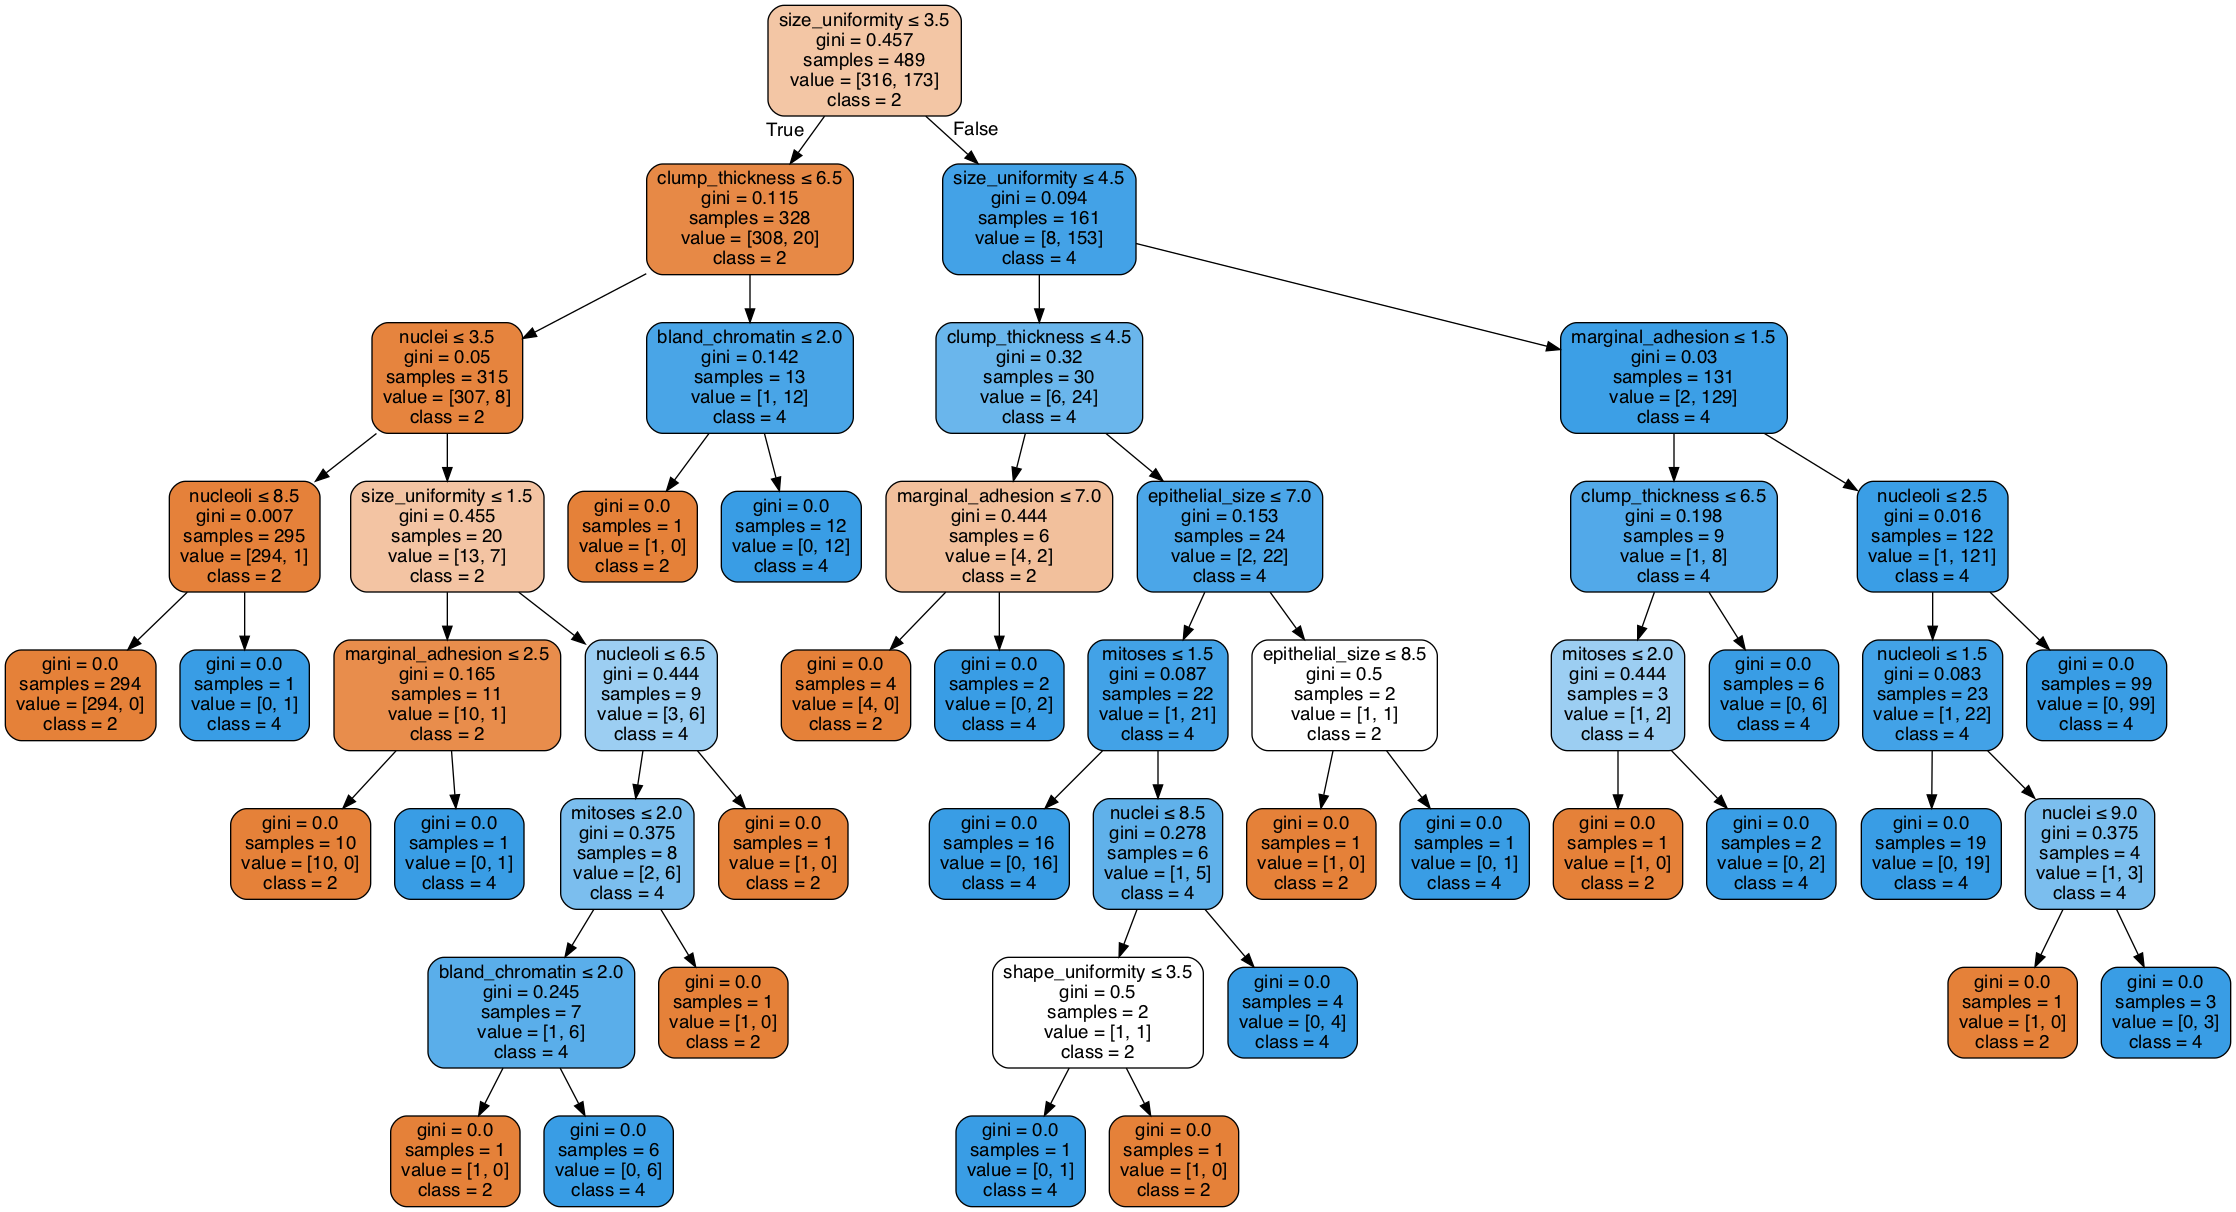

In [33]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('plot.png')
Image(graph.create_png())

So that looks really complicated, and is probably overfitting. so lets prune

In [49]:
# Create Decision Tree classifer object
tree2 = DecisionTreeClassifier(criterion="entropy", max_depth=4)
tree2 = tree2.fit(X_train,y_train)

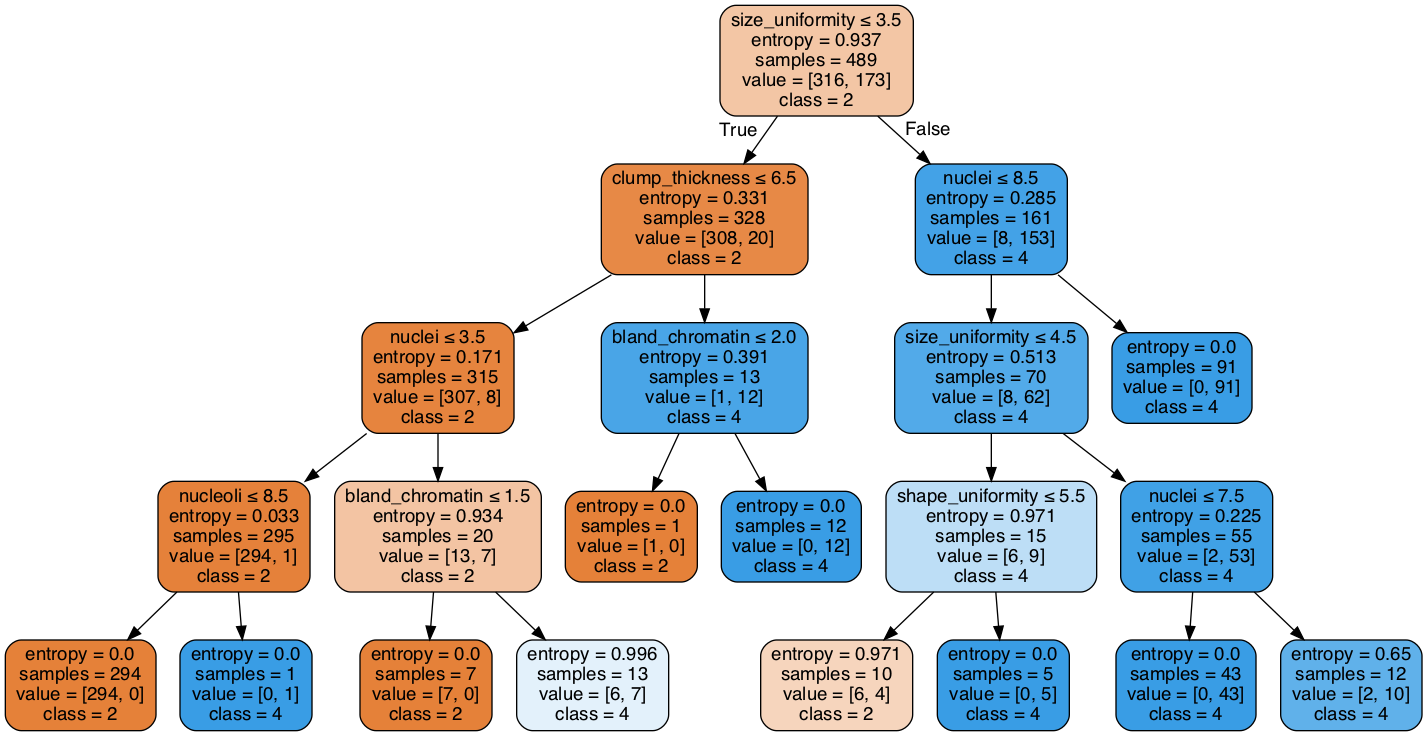

In [50]:
dot_data = StringIO()
export_graphviz(tree2,out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names,class_names=['2','4'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

Wow, that just looks so much better.

In [51]:
#predict the response for the test dataset
y_pred=tree2.predict(X_test)
#compute the model accuracy
metrics.accuracy_score(y_test,y_pred)

0.9333333333333333

In [52]:
# Create Decision Tree classifer object
tree3 = DecisionTreeClassifier(criterion="entropy", max_depth=3)
tree3 = tree3.fit(X_train,y_train)

In [53]:
#predict the response for the test dataset
y_pred=tree3.predict(X_test)
#compute the model accuracy
metrics.accuracy_score(y_test,y_pred)

0.9047619047619048

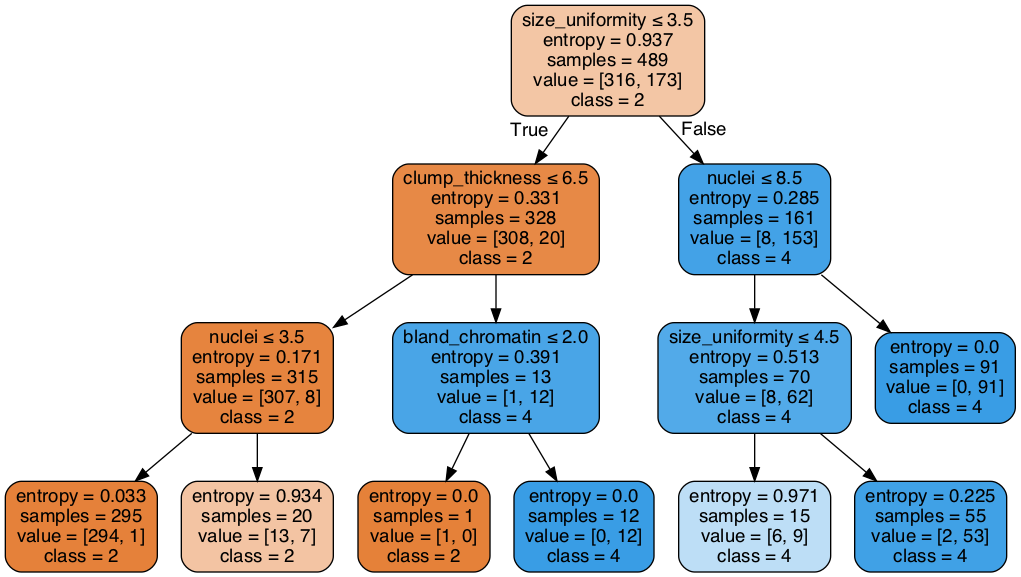

In [54]:
dot_data = StringIO()
export_graphviz(tree3,out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names,class_names=['2','4'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

Wow, so we saw that pruning to 4 levels accutually increased the accuracy, then 3 went down but just a little bit.

All are still over 90%.

However, above i don't like how all of the right side just goes to class 4, there are no other options

In [55]:
# Create Decision Tree classifer object
tree3 = DecisionTreeClassifier(criterion="entropy", max_depth=5)
tree3 = tree3.fit(X_train,y_train)

In [56]:
#predict the response for the test dataset
y_pred=tree3.predict(X_test)
#compute the model accuracy
metrics.accuracy_score(y_test,y_pred)

0.9285714285714286

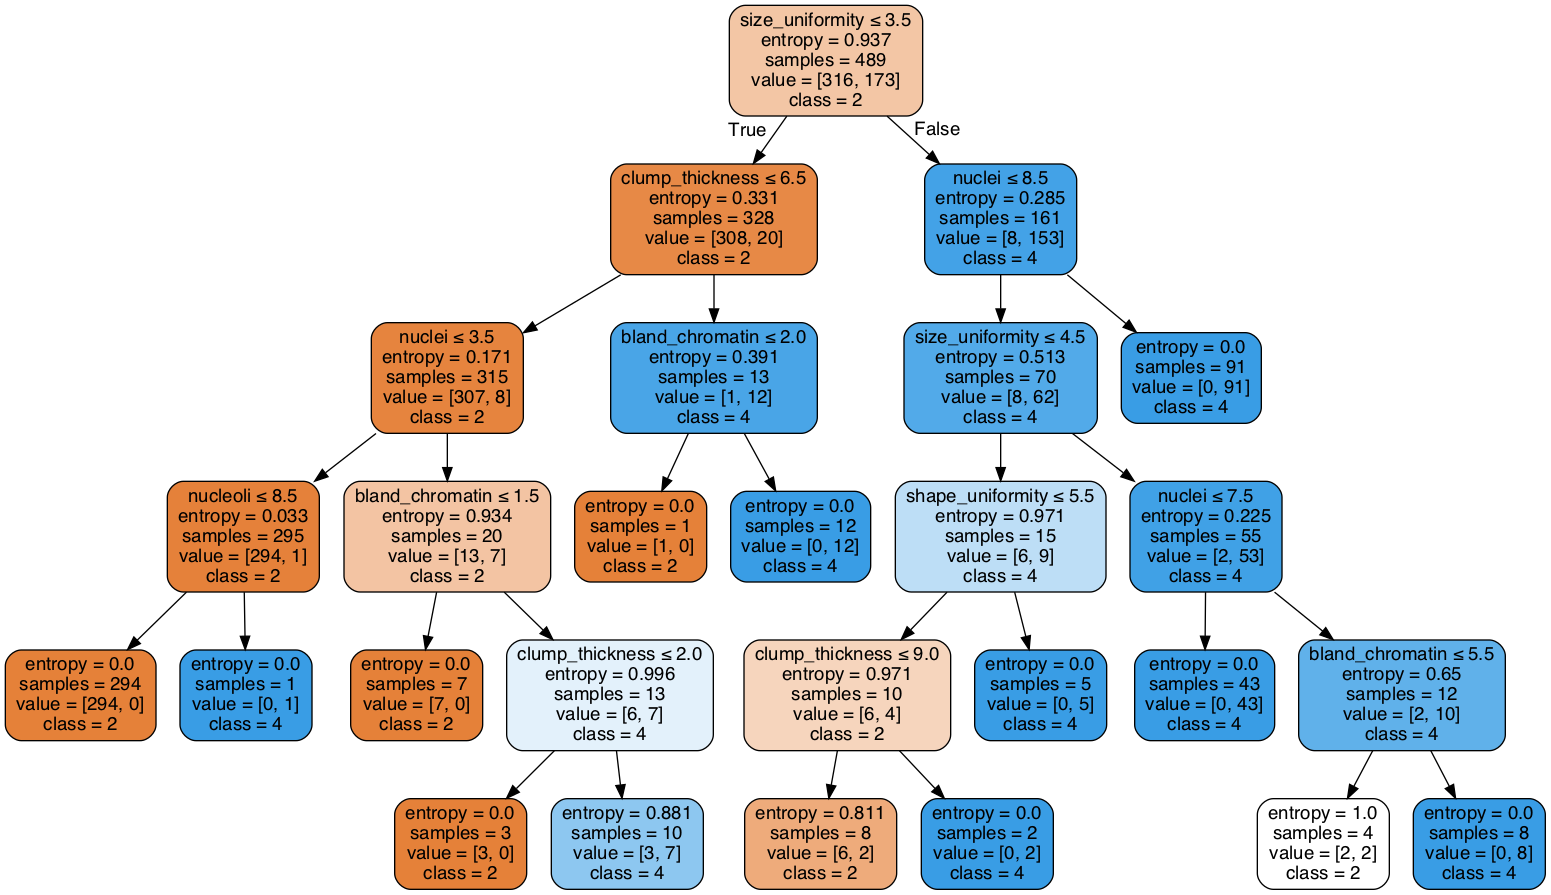

In [57]:
dot_data = StringIO()
export_graphviz(tree3,out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names,class_names=['2','4'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

This is better in terms of applying what we know about the field.
size and shape uniformity need an option to be 2, same with bland chromatin.

Wonder if I should play feature engineer and try this with just a few choosen columns, to force the ones i want?

In [58]:
### lets just try a gradient boosted model as well

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc


In [60]:
boosted = GradientBoostingClassifier()
boosted.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [62]:
y_pred = boosted.predict(X_test)

In [69]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred, pos_label=4)

In [70]:
roc_auc = auc(false_positive_rate, true_positive_rate)


In [71]:
roc_auc

0.9494614747307375

In [1]:
### WOW IT DID NOT SAVE THE WORK I DID FOR 2 hours of this...

In [ ]:
# i used this a lot https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3

In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization
[[134, 8], [8, 60]]


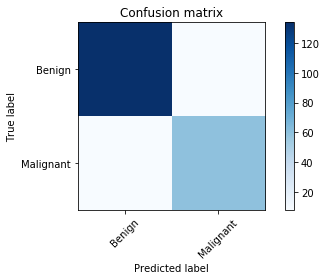

In [30]:
cm=[[134,8],[8,60]]
classes=['Benign','Malignant']
plot_confusion_matrix(cm, classes)

Confusion matrix, without normalization
[[134, 8], [6, 62]]


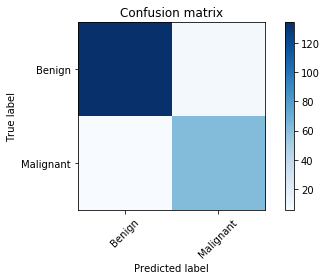

In [29]:
cm=[[134,8],[6,62]]
classes=['Benign','Malignant']
plot_confusion_matrix(cm, classes)

Confusion matrix, without normalization
[[133, 9], [5, 63]]


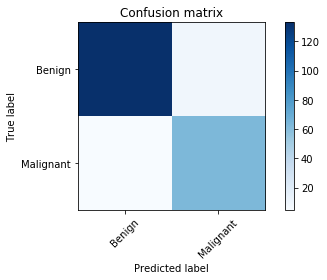

In [31]:
cm=[[133,9],[5,63]]
classes=['Benign','Malignant']
plot_confusion_matrix(cm, classes)